<h1> Projeto da disciplina Tópicos Avançados em SI 6 (Ciência dos Dados)</h1>
<h4> Centro de Informática - Universidade Federal de Pernambuco (CIn - UFPE) </h4>
<h4> Professor: Fernando Neto </h4>
<h4> Equipe: Márcio de Aquino, Vanessa Vieira </h4>
<br>
<h2> Base de dados: <a href=https://archive.ics.uci.edu/ml/datasets/Bank+Marketing> Bank Marketing </a> </h2>

## Hipóteses:
- É possível identificar e classificar um grupo mais provável de aceitar o depósito a prazo
- Há uma relação entre os grupos que aceitam o depósito e a situação sócio-econômica do período
- Há uma relação que engloba o intervalo entre ligações e a resposta
- O tempo de duração da ligação está relacionado com a resposta
- O fato do cliente ter algum empréstimo influencia na resposta


## Pré-processamento

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [269]:
phone_calls = pd.read_csv('./bank-additional/bank-additional-full.csv')

<p> </p>
<p> </p>
<h4> Verificando se há algum valor nulo</h4>

In [270]:
phone_calls.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<p> </p>
<h4> Verificando alguns atributos categóricos importantes, para checar se alguma linha foge do padrão</h4>

In [271]:
categorical_atributes = ['default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for a in categorical_atributes :
    print(phone_calls[a].value_counts())

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
no     36548
yes     4640
Name: y, dtype: int64


<p></p>
<h4> Verificando informações importantes dos dados númericos</h4>

In [272]:
phone_calls.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<h2> Discretizando e categorizando dados </h2>

<p> </p>
<p> Criando coluna que diz se o cliente tem alguma dívida </p>

In [273]:
phone_calls['in_debt'] = (
     phone_calls.apply(lambda x: 1 if (x.housing == 'yes' or x.loan  == 'yes' or x.default == 'yes') else 0 , axis=1)
     )
phone_calls['in_debt'].value_counts()

1    24135
0    17053
Name: in_debt, dtype: int64

<h3> Discretizando os dados sócio-econômicos em quantis </h3>

In [274]:
#quartiles = pd.cut(phone_calls['emp.var.rate'], 4, labels=range(1,5))
quartiles = pd.cut(phone_calls['emp.var.rate'], 4, labels=['emp_var_rate_1', 'emp_var_rate_2', 'emp_var_rate_3', 'emp_var_rate_4'])

phone_calls = phone_calls.assign(emp_var_rate_cat=quartiles.values)
phone_calls['emp_var_rate_cat'].value_counts()

emp_var_rate_4    23997
emp_var_rate_2    10592
emp_var_rate_3     3693
emp_var_rate_1     2906
Name: emp_var_rate_cat, dtype: int64

In [275]:
quartiles = pd.cut(phone_calls['cons.price.idx'], 4, labels=['cons_price_idx_1', 'cons_price_idx_2', 'cons_price_idx_3', 'cons_price_idx_4'])
phone_calls = phone_calls.assign(cons_price_idx_cat=quartiles.values)
phone_calls['cons_price_idx_cat'].value_counts()

cons_price_idx_2    18304
cons_price_idx_3    15363
cons_price_idx_4     5320
cons_price_idx_1     2201
Name: cons_price_idx_cat, dtype: int64

In [276]:
quartiles = pd.cut(phone_calls['cons.conf.idx'], 4, labels=['cons_conf_idx_1', 'cons_conf_idx_2', 'cons_conf_idx_3', 'cons_conf_idx_4'])
phone_calls = phone_calls.assign(cons_conf_idx_cat=quartiles.values)
phone_calls['cons_conf_idx_cat'].value_counts()

cons_conf_idx_2    16209
cons_conf_idx_3    14262
cons_conf_idx_1     8876
cons_conf_idx_4     1841
Name: cons_conf_idx_cat, dtype: int64

In [277]:
quartiles = pd.cut(phone_calls['euribor3m'], 4, labels=['euribor3m_1', 'euribor3m_2', 'euribor3m_3', 'euribor3m_4'])
phone_calls = phone_calls.assign(euribor3m_cat=quartiles.values)
phone_calls['euribor3m_cat'].value_counts()

euribor3m_4    27676
euribor3m_1    13430
euribor3m_2       68
euribor3m_3       14
Name: euribor3m_cat, dtype: int64

In [278]:
quartiles = pd.cut(phone_calls['nr.employed'], 4, labels=['nr_employed_1', 'nr_employed_2', 'nr_employed_3', 'nr_employed_4'])
phone_calls = phone_calls.assign(nr_employed_cat=quartiles.values)
phone_calls['nr_employed_cat'].value_counts()

nr_employed_4    27690
nr_employed_3     8534
nr_employed_1     3301
nr_employed_2     1663
Name: nr_employed_cat, dtype: int64

<h3> Categorizando outros dados </h3>

In [279]:
criteria = [phone_calls['age'].between(0, 30), phone_calls['age'].between(31, 50), phone_calls['age'].between(50, 200)]
values = ['youngers', 'middle-aged', 'olders']

phone_calls['age_cat'] = np.select(criteria, values, 0)
phone_calls['age_cat'].value_counts()

middle-aged    26625
youngers        7383
olders          7180
Name: age_cat, dtype: int64

In [280]:
criteria = [phone_calls['duration'].between(0, 20), phone_calls['duration'].between(21, phone_calls['duration'].mean()), phone_calls['duration'].between(phone_calls['duration'].mean(), phone_calls['duration'].max())]
values = ['short', 'mean', 'long']

phone_calls['duration_cat'] = np.select(criteria, values, 0)
phone_calls['duration_cat'].value_counts()

mean     26438
long     13665
short     1085
Name: duration_cat, dtype: int64

In [281]:
criteria = [phone_calls['campaign'].between(0, phone_calls['campaign'].mean()), phone_calls['campaign'].between(phone_calls['campaign'].mean(), phone_calls['campaign'].max())]
values = [0, 1]

phone_calls['campaign_cat'] = np.select(criteria, values, 0)
phone_calls['campaign_cat'].value_counts()

0    28212
1    12976
Name: campaign_cat, dtype: int64

In [282]:
pdays_without_999 = np.array([x for x in phone_calls['pdays'] if x != 999])

criteria = [phone_calls['pdays'].between(999,999), phone_calls['pdays'].between(0, pdays_without_999.mean()), phone_calls['pdays'].between(pdays_without_999.mean(), pdays_without_999.max())]
values = ['not_contacted', 'contacted_a_few_days_ ago', 'contacted_several_days_ago']

phone_calls['pdays_cat'] = np.select(criteria, values, 0)
phone_calls['pdays_cat'].value_counts()

not_contacted                 39673
contacted_a_few_days_ ago      1117
contacted_several_days_ago      398
Name: pdays_cat, dtype: int64

In [283]:
criteria = [phone_calls['previous'].between(0, phone_calls['previous'].mean()), phone_calls['previous'].between(phone_calls['previous'].mean(), phone_calls['previous'].max())]
values = [0, 1]

phone_calls['previous_cat'] = np.select(criteria, values, 0)
phone_calls['previous_cat'].value_counts()

0    35563
1     5625
Name: previous_cat, dtype: int64

<h3> Convertendo atributos categóricos em binários </h3>


In [284]:
#executar para converter o atributo de saída para binário
results = {'no': 0, 'yes': 1}
phone_calls.y = [ results[el] for el in phone_calls.y]

In [285]:
#executar para converter o atributo de contact para binário
results = {'telephone': 0, 'cellular': 1}
phone_calls.contact = [ results[el] for el in phone_calls.contact]

In [286]:
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('job')), lsuffix="job_", rsuffix="_job")
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('marital')), rsuffix="_marital" )
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('default')), rsuffix="_default" )
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('education')), rsuffix="_education" )
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('housing')), rsuffix="_housing" )
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('loan')), rsuffix="_loan" )
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('month')), rsuffix="_month" )
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('day_of_week')), rsuffix="_day_of_week" )
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('poutcome')), lsuffix="poutcome_", rsuffix="_poutcome" )

In [287]:
phone_calls.head()

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,oct,sep,fri,mon,thu,tue,wed,failure,nonexistent,success
0,56,0,261,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
1,57,0,149,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
2,37,0,226,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
3,40,0,151,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
4,56,0,307,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0


In [288]:
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('emp_var_rate_cat')))
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('cons_price_idx_cat')))
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('cons_conf_idx_cat')))
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('euribor3m_cat')))
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('nr_employed_cat')))

phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('age_cat')), lsuffix="age_cat_", rsuffix="_age_cat")
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('duration_cat')), lsuffix="duration_cat_", rsuffix="_duration_cat")
phone_calls =  phone_calls.join(pd.get_dummies(phone_calls.pop('pdays_cat')), lsuffix="pdays_cat_", rsuffix="_pdays_cat")

In [292]:
phone_calls.head()

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,nr_employed_4,middle-aged,olders,youngers,long,mean,short,contacted_a_few_days_ ago,contacted_several_days_ago,not_contacted
0,56,0,261,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,1,0,1,0,0,0,0,1
1,57,0,149,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,1,0,0,1,0,0,0,1
2,37,0,226,1,999,0,1.1,93.994,-36.4,4.857,...,1,1,0,0,0,1,0,0,0,1
3,40,0,151,1,999,0,1.1,93.994,-36.4,4.857,...,1,1,0,0,0,1,0,0,0,1
4,56,0,307,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,1,0,1,0,0,0,0,1


In [294]:
final_list_of_collumns = []
for x in phone_calls: final_list_of_collumns.append(x)
print("Lista final de colunas:", final_list_of_collumns)

Lista final de colunas: ['age', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'in_debt', 'campaign_cat', 'previous_cat', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single', 'unknown_marital', 'no', 'unknown_default', 'yes', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown_education', 'no_housing', 'unknown_housing', 'yes_housing', 'no_loan', 'unknown_loan', 'yes_loan', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure', 'nonexistent', 'success', 'emp_var_rate_1', 'emp_var_rate_2', 'emp_var_rate_3', 'emp_var_rate_4', 'cons_price_idx_1', 'cons_price_idx_2', 'cons_price_idx_3', 'cons_price_idx_4', 'cons_conf_idx_1', 'cons_conf_id

<h1> Executando de Inteligência Artificial para cada hipótese</h1>

In [383]:
from sklearn.metrics import accuracy_score #função que calcula taxa de acerto
from sklearn.model_selection import train_test_split #função que particiona os dados em treino e teste
from sklearn.metrics import classification_report, confusion_matrix    

### Sobre o relatório de classificação:
* Precision: Precisão das previsões positivas.
<p>Precision = TP / (TP + FP)</p>
* Recall: Lembre-se: Fração de positivos que foram corretamente identificados.
<p>Recall = TP / (TP + FN)</p>
* F1 Score: Porcentagem de previsões positivas corretas.
<p>F1 Score = 2 * (Recall * Precision) / (Recall + Precision)</p>
* Support: Quantidade de elementos no conjunto de teste

<h2> Separando conjuntos de treino e de teste </h2>

In [ ]:
#OUTPUT (target)
y = phone_calls['y'].values

In [374]:
def setTrainTest(X, y):
    #dividindo os conjuntos de entrada e saída em conjuntos de 70% p/ treino e de 30% p/ teste 
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=1)
    return X_train, X_test, y_train, y_test

<p></p>
<h2>Função que irá executar cada um dos algoritmos quando for chamada, com os conjuntos de treino e de teste relacionados a cada uma das hipóteses</h2>

In [378]:
def algorithmExecute(algorithm, trainAndTest) :

    #TREINAMENTO
    algorithm.fit(X_train, y_train)   #a funcao fit treina a rede neural com o conjunto de entrada X e a saida esperada y

    #TESTE
    y_pred = algorithm.predict(X_test) #prediz qual a classe que pertence ao conjunto de teste

    #CONFERINDO RESULTADOS
    taxa = accuracy_score(y_test, y_pred)*100
    
    return taxa

<h2>Hipótese "É possível identificar e classificar um grupo mais provável de aceitar o depósito a prazo"</h2>

In [370]:
#INPUTS
X = phone_calls[['middle-aged', 'olders', 'youngers', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single', 'unknown_marital', 'no', 'unknown_default', 'yes', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown_education']].values
trainAndTest = setTrainTest(X, y)

<h2>Hipótese "Há uma relação entre os grupos que aceitam o depósito e a situação sócio-econômica do país no período"</h2>

In [373]:
#INPUTS
X = phone_calls[['emp_var_rate_2', 'emp_var_rate_3', 'emp_var_rate_4', 'cons_price_idx_1', 'cons_price_idx_2', 'cons_price_idx_3', 'cons_price_idx_4','cons_conf_idx_1', 'cons_conf_idx_2', 'cons_conf_idx_3', 'cons_conf_idx_4', 'euribor3m_1', 'euribor3m_2', 'euribor3m_3', 'euribor3m_4', 'nr_employed_1', 'nr_employed_2', 'nr_employed_3', 'nr_employed_4']].values  
trainAndTest = setTrainTest(X, y)

<h3> MLP (Multilayer Perceptron) </h3>


In [ ]:
#Dúvida sobre melhor forma de fazer as mudança de parâmetros:
#1ª FORMA: Mudar um conjunto de 3 parâmetros de uma vez
mlp1 = MLPClassifier(solver='adam', alpha=0.0001, 
                    hidden_layer_sizes=(100,)) 

mlp2 = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                    hidden_layer_sizes=(20,))


#2ª FORMA: Mudar 1 parâmetro por vez
mlp1 = MLPClassifier(solver='lbfgs') 
mlp2 = MLPClassifier(alpha=1e-5)
mlp3 = MLPClassifier(hidden_layer_sizes=(20,))

In [ ]:
from sklearn.neural_network import MLPClassifier

In [382]:
mlp1 = MLPClassifier(solver='adam', alpha=0.0001, 
                    hidden_layer_sizes=(100,), random_state=1) 

algorithmExecute(mlp1, trainAndTest)
print('A taxa de acerto do MLP com o primeiro conjunto de parâmetros foi: {:.2f}%\n'.format(taxa))


A taxa de acerto do MLP com o primeiro conjunto de parâmetros foi: 88.87%



In [320]:
mlp2 = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                    hidden_layer_sizes=(20,), random_state=1)

algorithmExecute(mlp2, trainAndTest)
print('A taxa de acerto do MLP 2 com o segundo conjunto de parâmetros foi: {:.2f}%'.format(taxa))

A taxa de acerto do MLP 2 com o segundo conjunto de parâmetros foi: 88.87%


<p></p>
<p> Para o MLP com a segunda opção de parâmetros: </p>

In [304]:
print("MATRIZ DE CONFUSÃO:\n", confusion_matrix(y_test, y_pred)) 
print("\nRELATÓRIO DE CLASSIFICAÇÃO:\n", classification_report(y_test, y_pred))

MATRIZ DE CONFUSÃO:
 [[10672   272]
 [ 1105   308]]

RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     10944
           1       0.53      0.22      0.31      1413

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.72      0.60      0.62     12357
weighted avg       0.86      0.89      0.87     12357



<p> </p>
<h4> Taxa de erro com 1 camada na rede neural </h4>

Text(0, 0.5, 'Erro médio')

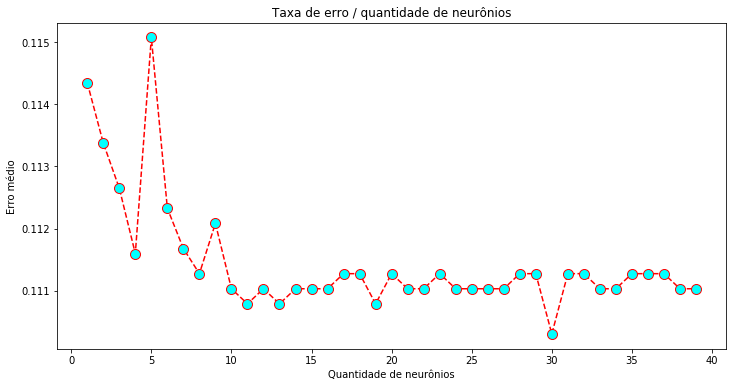

In [308]:
errorOneLayer = []

for i in range(1, 40):  
    mlpTestError = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                    hidden_layer_sizes=(i,), random_state=1)
    mlpTestError.fit(X_train, y_train)
    pred_i = mlpTestError.predict(X_test)
    errorOneLayer.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), errorOneLayer, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='cyan', markersize=10)
plt.title('Taxa de erro / quantidade de neurônios')  
plt.xlabel('Quantidade de neurônios')  
plt.ylabel('Erro médio')

<p> </p>
<h4>Taxa de erro com 2 camadas na rede neural </h4>

Text(0, 0.5, 'Erro médio')

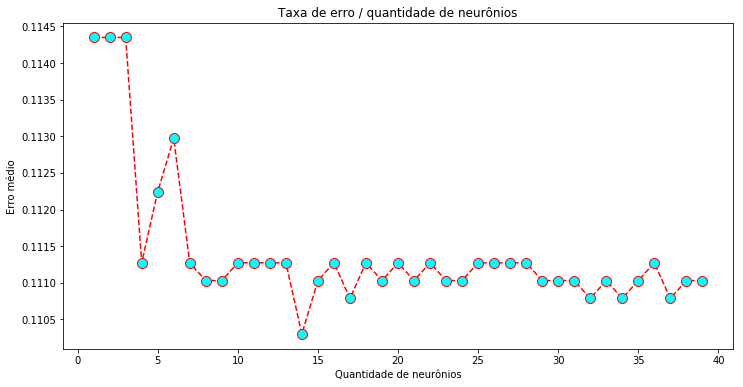

In [309]:
errorTwoLayers = []

for i in range(1, 40):  
    mlpTestError = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                    hidden_layer_sizes=(i, i, ), random_state=1)
    mlpTestError.fit(X_train, y_train)
    pred_i = mlpTestError.predict(X_test)
    errorTwoLayers.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), errorTwoLayers, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='cyan', markersize=10)
plt.title('Taxa de erro / quantidade de neurônios')  
plt.xlabel('Quantidade de neurônios')  
plt.ylabel('Erro médio')

<h3> K-means supervisionado (Neighbors Nearest Centroid) </h3>

In [384]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

In [324]:
nc1 = NearestCentroid()

algorithmExecute(nc1, trainAndTest)

print('A taxa de acerto do Nearest Centroid (K-Means supervisionado) com o primeiro conjunto de parâmetros foi: {:.2f}%\n'.format(taxa))

A taxa de acerto do Nearest Centroid (K-Means supervisionado) com o primeiro conjunto de parâmetros foi: 72.52%



In [325]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

nc2 = NearestCentroid() #VERIFICAR QUAIS PARÂMETROS PODEM SER ALTERADOS

algorithmExecute(nc2, trainAndTest)

print('A taxa de acerto do Nearest Centroid (K-Means supervisionado) com o segundo conjunto de parâmetros foi: {:.2f}%\n'.format(taxa))

A taxa de acerto do Nearest Centroid (K-Means supervisionado) com o segundo conjunto de parâmetros foi: 72.52%



<p></p>
<p> Para o Nearest Centroid com a segunda opção de parâmetros: </p>

In [316]:
print("MATRIZ DE CONFUSÃO:\n", confusion_matrix(y_test, y_pred)) 
print("\nRELATÓRIO DE CLASSIFICAÇÃO:\n", classification_report(y_test, y_pred))

MATRIZ DE CONFUSÃO:
 [[7940 3004]
 [ 392 1021]]

RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82     10944
           1       0.25      0.72      0.38      1413

   micro avg       0.73      0.73      0.73     12357
   macro avg       0.60      0.72      0.60     12357
weighted avg       0.87      0.73      0.77     12357



<h3> SVM (Support Vector Machine)</h3>


In [385]:
from sklearn import svm

In [328]:
svmClf1 = svm.SVC(gamma='scale')

algorithmExecute(svmClf1, trainAndTest)

print('A taxa de acerto do SVM com o primeiro conjunto de parâmetros foi: {:.2f}%'.format(taxa))


A taxa de acerto do SVM com o primeiro conjunto de parâmetros foi: 88.87%


In [347]:
svmClf2 = svm.SVC(gamma='scale') #MUDAR ALGUNS PARÂMETROS DO SVM E TESTAR

algorithmExecute(svmClf2, trainAndTest)

print('A taxa de acerto do SVM com o segundo conjunto de parâmetros foi: {:.2f}%'.format(taxa))

A taxa de acerto do SVM com o segundo conjunto de parâmetros foi: 88.87%


<p></p>
<p> Para o SVM com o segundo conjunto de parâmetros: </p>

In [341]:
print("MATRIZ DE CONFUSÃO:\n", confusion_matrix(y_test, y_pred)) 
print("\nRELATÓRIO DE CLASSIFICAÇÃO:\n", classification_report(y_test, y_pred))

MATRIZ DE CONFUSÃO:
 [[10707   237]
 [ 1132   281]]

RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     10944
           1       0.54      0.20      0.29      1413

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.72      0.59      0.62     12357
weighted avg       0.86      0.89      0.87     12357



<h3> Decision Tree  </h3>


In [ ]:
from sklearn import tree

In [333]:
decisionTree1 = tree.DecisionTreeClassifier()

algorithmExecute(decisionTree1, trainAndTest)

print('A taxa de acerto da Árvore de Decisão com o primeiro conjunto de parâmetros foi: {:.2f}%'.format(percent))

A taxa de acerto da Árvore de Decisão com o primeiro conjunto de parâmetros foi: 88.92%


In [343]:
decisionTree2 = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=10, presort=True)

algorithmExecute(decisionTree2, trainAndTest)

print('A taxa de acerto da Árvore de Decisão com o segunda conjunto de parâmetros foi: {:.2f}%'.format(percent))

A taxa de acerto da Árvore de Decisão com o segunda conjunto de parâmetros foi: 88.92%


<p></p>
<p> Para a Árvore de Decisão com o segunda conjunto de parâmetros: </p>

In [344]:
print("MATRIZ DE CONFUSÃO:\n", confusion_matrix(y_test, y_pred)) 
print("\nRELATÓRIO DE CLASSIFICAÇÃO:\n", classification_report(y_test, y_pred))

MATRIZ DE CONFUSÃO:
 [[10707   237]
 [ 1132   281]]

RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     10944
           1       0.54      0.20      0.29      1413

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.72      0.59      0.62     12357
weighted avg       0.86      0.89      0.87     12357



<h3> K-Fold Cross Validation  </h3>


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import KFold

In [360]:
def kfoldExecute(mlp, nc, svmClf, decisionTree) :
    models = []
    models.append(("MLP: ", mlp))
    models.append(("NC: ", nc))
    models.append(("SVM: ", svmClf))
    models.append(("DT: ", decisionTree))
    seed=7
    results = []
    names = []
    scoring = 'accuracy'
    for i in range(2,5): 
        print("\nCom", i, "folds:")
        for name, model in models:
            kfold = model_selection.KFold(n_splits=i, random_state=seed)
            cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)

    print('\n')
    fig = plt.figure()
    fig.suptitle('Comparação dos algoritmos')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()


Com 2 folds:
MLP: : 0.887346 (0.065893)
NC: : 0.641862 (0.311377)
SVM: : 0.744804 (0.076649)
DT: : 0.470914 (0.350539)

Com 3 folds:
MLP: : 0.887344 (0.091263)
NC: : 0.715032 (0.334626)
SVM: : 0.887344 (0.091263)
DT: : 0.887757 (0.090683)

Com 4 folds:
MLP: : 0.887346 (0.087123)
NC: : 0.719724 (0.283937)
SVM: : 0.887346 (0.087123)
DT: : 0.887346 (0.087123)




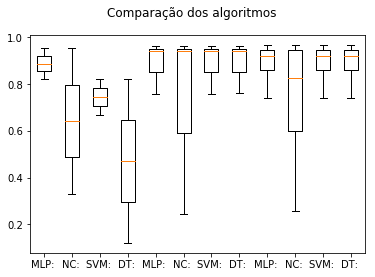

In [361]:
kfoldExecute(mlp1, nc1, svmClf1, decisionTree1)


Com 2 folds:
MLP: : 0.887346 (0.065893)
NC: : 0.641862 (0.311377)
SVM: : 0.744804 (0.076649)
DT: : 0.470914 (0.350539)

Com 3 folds:
MLP: : 0.887344 (0.091263)
NC: : 0.715032 (0.334626)
SVM: : 0.887344 (0.091263)
DT: : 0.887344 (0.091263)

Com 4 folds:
MLP: : 0.887346 (0.087123)
NC: : 0.719724 (0.283937)
SVM: : 0.887346 (0.087123)
DT: : 0.887346 (0.087123)




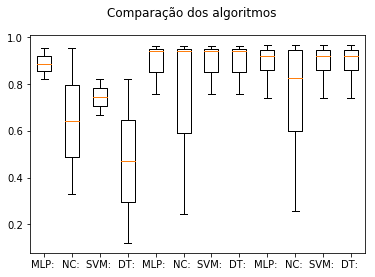

In [362]:
kfoldExecute(mlp2, nc2, svmClf2, decisionTree2)

<h2>Hipótese "Há uma relação que engloba o intervalo entre ligações e a resposta"</h2>

In [366]:
#INPUTS
X = phone_calls[['not_contacted', 'contacted_a_few_days_ ago', 'contacted_several_days_ago']].values
trainAndTest = setTrainTest(X, y)

<h2>Hipótese "O tempo de duração da ligação está relacionado com a resposta"</h2>

In [367]:
#INPUTS
X = phone_calls[['short', 'mean', 'long']].values
trainAndTest = setTrainTest(X, y)

<h2>Hipótese "O fato do cliente ter algum tipo de empréstimo influencia na resposta"</h2>

In [380]:
#INPUTS
X = phone_calls['in_debt'].values
trainAndTest = setTrainTest(X, y)